In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Dell\Downloads\fraud_data.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Shape and basic info
print("Shape of dataset:", df.shape)
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Statistical summary
df.describe()


Shape of dataset: (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode 'type' column
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Drop unhelpful columns
df_model = df.drop(['nameOrig', 'nameDest', 'type'], axis=1)

# Define features and target
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']


In [13]:
# ✅ Sample only 5% of the full data to speed up training
df_sample = df_model.sample(frac=0.05, random_state=42)  # ~318,000 rows

# Split features and target
X = df_sample.drop('isFraud', axis=1)
y = df_sample['isFraud']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions & Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[63544     0]
 [   19    64]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     63544
           1       1.00      0.77      0.87        83

    accuracy                           1.00     63627
   macro avg       1.00      0.89      0.94     63627
weighted avg       1.00      1.00      1.00     63627

ROC AUC Score: 0.9814849856431896


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Train the model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[63544     0]
 [   19    64]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     63544
           1       1.00      0.77      0.87        83

    accuracy                           1.00     63627
   macro avg       1.00      0.89      0.94     63627
weighted avg       1.00      1.00      1.00     63627

ROC AUC Score: 0.9814849856431896


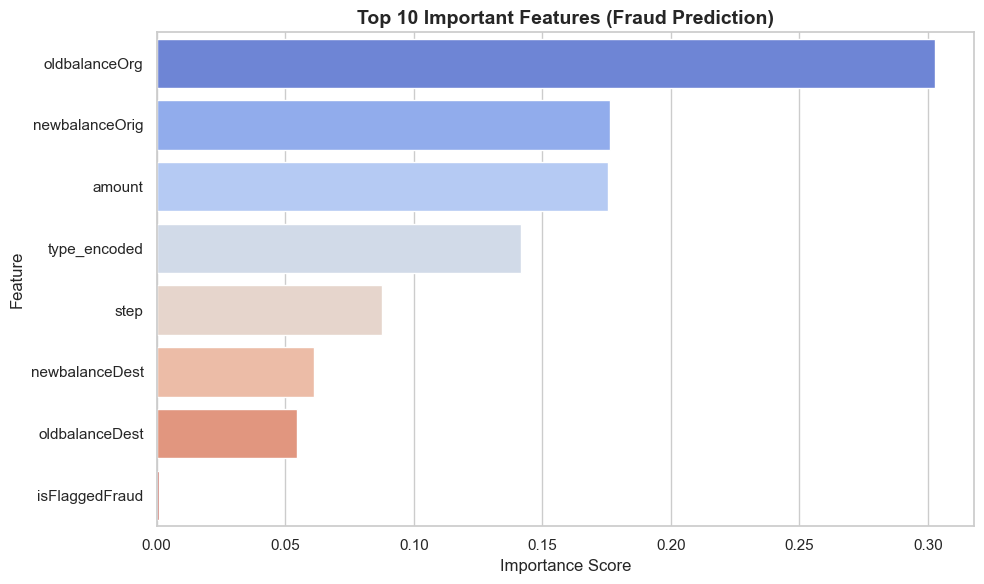

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top10 = feature_importance.head(10).reset_index()
top10.columns = ['Feature', 'Importance']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    x='Importance',
    y='Feature',
    hue='Feature',              # <- this avoids the warning
    dodge=False,                # prevent separation
    palette='coolwarm',
    legend=False                # hide legend since hue = y
)


plt.title("Top 10 Important Features (Fraud Prediction)", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("feature_importance.png", bbox_inches='tight')
plt.show()


In [24]:
!pip freeze > requirements.txt